In [ ]:
!pip install numpy 
!pip install tensorflow
!pip install matplotlib 
!pip install tqdm 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from gtda.plotting import plot_heatmap

In [2]:
import numpy as np
from gtda.plotting import plot_heatmap
from sklearn.datasets import fetch_openml
from gtda.diagrams import HeatKernel
from gtda.images import Binarizer

from gtda.images import RadialFiltration

from gtda.homology import CubicalPersistence

from gtda.diagrams import Scaler

from sklearn.pipeline import Pipeline
from gtda.diagrams import Amplitude

In [3]:
os.listdir("C:/EUR/Stage/Dataset/archive/data")

['test', 'train']

In [4]:
folder_benign_train = 'C:/EUR/Stage/Dataset/archive/data/train/benign'
folder_malignant_train = 'C:/EUR/Stage/Dataset/archive/data/train/malignant'

folder_benign_test = 'C:/EUR/Stage/Dataset/archive/data/test/benign'
folder_malignant_test = 'C:/EUR/Stage/Dataset/archive/data/test/malignant'

#convert to 2D image
read = lambda imname: np.asarray(Image.open(imname).convert("L"))
#convert to 3D image
#read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]


# Display the dataset

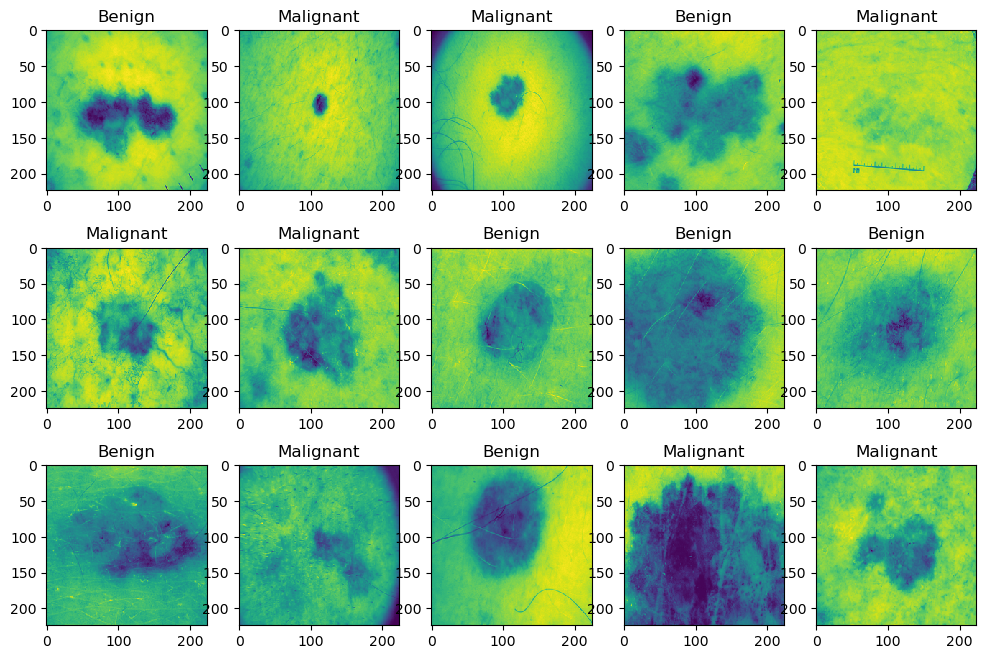

In [5]:
# Display first 15 images and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

# Dataset
The dataset is almost balanced. It has 1800 benign samples and 1497 malignant samples

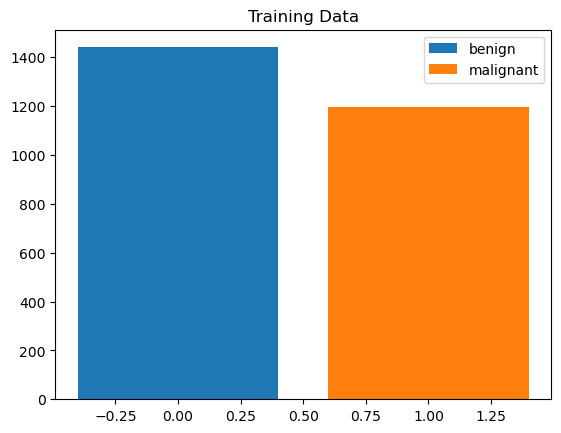

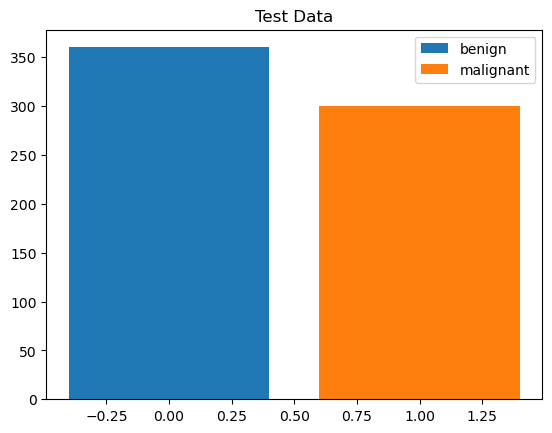

In [6]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

In [7]:
X_train.shape

(2637, 224, 224)

In [8]:
print(f"X shape: {X_train.shape}, y shape: {y_train.shape}")

X shape: (2637, 224, 224), y shape: (2637,)


In [9]:
X_train[4].shape

(224, 224)

# From pixels to topological features
We want to extract topological features from an image. We are going to use filtration of cubical complexes instead of simplicial ones

## Binarization of the dataset

    Converting our grayscale image to binary image(consisting of only black and white pixels)

In [29]:

from gtda.images import Binarizer

In [40]:
i = 0
img8 = X_train[i]
plot_heatmap(img8)


In [41]:
im8 = X_train[i][None, :, :]
binarizer = Binarizer(threshold=0.4)
im8_binarized = binarizer.fit_transform(im8)

binarizer.plot(im8_binarized)

In [42]:
if y_train[i] == 0:
       print('Benign')
else:
       print('Malignant')

Malignant


## From binary image to filtration


The different filtration in giototda are:
    - HeightFiltration
    - RadialFiltration
    - DilationFiltration
    - ErosionFiltration
    - SignedDistanceFiltration
    - DensityFiltration

In [43]:
from gtda.images import RadialFiltration

radial_filtration = RadialFiltration(center=np.array([20, 6]))
im8_filtration = radial_filtration.fit_transform(im8_binarized)

radial_filtration.plot(im8_filtration, colorscale="jet")

## From filtration to persistence diagram

In [44]:
from gtda.homology import CubicalPersistence


In [45]:
cubical_persistence = CubicalPersistence(n_jobs=-1)
im8_cubical = cubical_persistence.fit_transform(im8_filtration)

cubical_persistence.plot(im8_cubical)

We can clearly see H1 generators corresponding to loops with  H0 generator  corresponding to connected component

In [26]:
from gtda.homology import CubicalPersistence

cubical_persistence = CubicalPersistence(n_jobs=-1)
im8_cubical2 = cubical_persistence.fit_transform(X_train[i])

cubical_persistence.plot(im8_cubical2)

In [46]:
#rescalling the persistence diagrams
from gtda.diagrams import Scaler

scaler = Scaler()
im8_scaled = scaler.fit_transform(im8_cubical)

scaler.plot(im8_scaled)

## From persistence diagram to representation

    The final step is to define a vectorial representation of the persistence diagram that can be used to obtain machine learning features. 

In [47]:
from gtda.diagrams import HeatKernel

heat = HeatKernel(sigma=.15, n_bins=60, n_jobs=-1)
im8_heat = heat.fit_transform(im8_scaled)

# Visualise the heat kernel for H1
heat.plot(im8_heat, homology_dimension_idx=1, colorscale='jet')

In [48]:
from sklearn.pipeline import make_pipeline, make_union
from gtda.diagrams import PersistenceEntropy
from gtda.images import HeightFiltration
from gtda.images import RadialFiltration

direction_list = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Listing all metrics we want to use to extract diagram amplitudes
metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]

#
feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)]
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)

In [49]:
from sklearn import set_config
set_config(display='diagram')

tda_union

FeatureUnion(n_jobs=-1,
             transformer_list=[('pipeline-1',
                                Pipeline(steps=[('binarizer',
                                                 Binarizer(n_jobs=-1,
                                                           threshold=0.4)),
                                                ('heightfiltration',
                                                 HeightFiltration(direction=array([1, 0]),
                                                                  n_jobs=-1)),
                                                ('cubicalpersistence',
                                                 CubicalPersistence(n_jobs=-1)),
                                                ('scaler', Scaler(n_jobs=-1)),
                                                ('featureunion',
                                                 FeatureUnion(transformer_list=[('persistenceentropy',
                                                                                 Persist...
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-11',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-12',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-13',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1))]))]))])

In [50]:
print(X_train.shape) 

(2637, 224, 224)


In [51]:
X_train_tda = tda_union.fit_transform(X_train[0:100])
X_train_tda.shape

(100, 476)

## Display the result

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_tda, y_train[0:100])

RandomForestClassifier()

In [53]:
X_test_tda = tda_union.transform(X_test[0:100])

In [54]:
rf.score(X_test_tda, y_test[0:100])

0.64

## My observations

In [55]:
i = 10
im8 = X_train[i][None, :, :]
im8_binarized = binarizer.fit_transform(im8)


im8_filtration = radial_filtration.fit_transform(im8_binarized)



im8_cubical = cubical_persistence.fit_transform(im8_filtration)

cubical_persistence.plot(im8_cubical)

In [69]:
for i in range(1):
    if y_train[i] == 0:
        print('Benign')
    else:
        print('Malignant')
    im8 = X_train[i][None, :, :]
    im8_binarized = binarizer.fit_transform(im8)
    im8_filtration = radial_filtration.fit_transform(im8_binarized)
    im8_cubical = cubical_persistence.fit_transform(im8_filtration)
    cubical_persistence.plot(im8_cubical)


Malignant


In [67]:
def cancertype(i):
    if y_train[i] == 0:
        print('Benign')
    else:
        print('Malignant')

In [72]:
i = 0
cancertype(i)
im8 = X_train[i][None, :, :]
im8_binarized = binarizer.fit_transform(im8)
im8_filtration = radial_filtration.fit_transform(im8_binarized)
im8_cubical = cubical_persistence.fit_transform(im8_filtration)
cubical_persistence.plot(im8_cubical)


Malignant


In [73]:
i = 1
cancertype(i)
im8 = X_train[i][None, :, :]
im8_binarized = binarizer.fit_transform(im8)
im8_filtration = radial_filtration.fit_transform(im8_binarized)
im8_cubical = cubical_persistence.fit_transform(im8_filtration)
cubical_persistence.plot(im8_cubical)

Benign


In [74]:
i = 2
cancertype(i)
im8 = X_train[i][None, :, :]
im8_binarized = binarizer.fit_transform(im8)
im8_filtration = radial_filtration.fit_transform(im8_binarized)
im8_cubical = cubical_persistence.fit_transform(im8_filtration)
cubical_persistence.plot(im8_cubical)

Malignant


In [76]:
#HERE, the binerization of this image gave a black image. Why?
i = 20
cancertype(i)
im8 = X_train[i][None, :, :]
im8_binarized = binarizer.fit_transform(im8)
im8_filtration = radial_filtration.fit_transform(im8_binarized)
im8_cubical = cubical_persistence.fit_transform(im8_filtration)
cubical_persistence.plot(im8_cubical)

Benign


In [77]:
i = 10
cancertype(i)
im8 = X_train[i][None, :, :]
im8_binarized = binarizer.fit_transform(im8)
im8_filtration = radial_filtration.fit_transform(im8_binarized)
im8_cubical = cubical_persistence.fit_transform(im8_filtration)
cubical_persistence.plot(im8_cubical)

Benign


In [79]:
i = 12
cancertype(i)
im8 = X_train[i][None, :, :]
im8_binarized = binarizer.fit_transform(im8)
im8_filtration = radial_filtration.fit_transform(im8_binarized)
im8_cubical = cubical_persistence.fit_transform(im8_filtration)
cubical_persistence.plot(im8_cubical)

Malignant
